# Лабораторная работа 3. Сравнение альтернатив

## Импорт библиотек и настройки

In [ ]:
import os # библиотека для работы с операционной системой

import numpy as np  # библиотека для поддержки больших многомерных массивов и матриц
import pandas as pd  # библиотека для обработки данных в виде (таблиц) датафреймов

import matplotlib.pyplot as plt # библиотка двумерной графики
import seaborn as sns # библиотка для визуалицаии данных
# функция, которая позволяет отображать графики matplotlib непосредственно в ячейке, где они были сделаны
%matplotlib inline 
import warnings  # библиотека для работы с предупреждениями
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Зададим пути для входных данных и сохранения результатов

In [ ]:
inputPath = "../0. data/" # Введите путь до каталога с входными данными
outputPath = "./output/" # Введите путь до желаемого каталога с результатами
if not os.path.exists(outputPath): # Проверка существования папки с результатами
    os.makedirs(outputPath)     # Создание папки с результатами,  в случае если ее не существует

## Чтение и подготовка данных

Считаем данные и выведем первые несколько строк таблицы

In [ ]:
data_pd = pd.read_csv('ModelData.csv', index_col=0)
data_pd.head(10)

,woe_max_arrears_12m,woe_bureau_score,woe_cc_util,woe_num_ccj,woe_emp_length,woe_months_since_recent_cc_delinq,woe_annual_income,default_flag
0,0.675750,1.034578,1.852935,0.177302,-0.369946,-0.192033,0.586514,0
1,0.675750,0.770801,-0.470497,0.177302,0.559709,-0.192033,0.586514,0
2,-2.213109,-0.790017,-0.470497,-0.864667,-0.369946,-0.431236,-1.796272,1
3,0.675750,0.770801,1.852935,0.177302,0.559709,-0.431236,0.246794,0
4,0.675750,0.770801,-2.323441,0.177302,0.559709,-0.431236,0.586514,0
5,0.675750,0.770801,-0.470497,0.177302,-0.369946,-0.431236,0.246794,1
6,0.675750,1.034578,1.852935,0.177302,0.559709,1.353357,0.586514,0
7,0.675750,1.034578,-0.470497,0.177302,0.184187,-0.431236,0.586514,0
8,0.675750,-0.790017,1.852935,0.177302,-0.727325,1.353357,-0.820765,0
9,-2.213109,-0.068048,1.852935,0.177302,0.559709,-0.192033,0.246794,0


## Построение моделей

Разделим выборку на тестовую и тренировочную

In [ ]:
#имортируем функцию, позволяющую делить выборку на тестовую и тренировочную в случайном порядке:
from sklearn.model_selection import train_test_split 

#Аргументы функции:
# X-датафрейм независимых переменных
# y - зависимая переменная
# test_size - размер тестовой выборки в %
# random_state - начальная точка генератора случайных чисел. Для воспроизведения результата необходимо указать любое число.

# Результат работы функции:
# X_train - датафрейм независимых переменных тренировочная выборка
# X_test - датафрейм независимых переменных тестовая выборка
# y_train - зависимая переменная тренировочная выборка
# y_test - зависимая переменная тестовая выборка

In [ ]:
#Разделим выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(data_pd.drop('default_flag', axis=1), 
                                                    data_pd['default_flag'], test_size=.3, 
                                                    random_state=2122)
train_full = pd.concat([y_train, X_train], axis=1) # объединим независимые и зависимую пременные тренировочной выборки в общий датафрейм
test_full = pd.concat([y_test, X_test], axis=1)# объединим независимые и зависимую пременные тестовой выборки в общий датафрейм


### 1. Метод k-ближайших соседей (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # импортируем необходимый класс изи библиотеки sklearn

Обучаем классификатор

In [ ]:
clf_kBest = KNeighborsClassifier(n_neighbors=5) # создадим модель 5ти ближайших соседей
clf_kBest.fit(X_train, y_train)  # оценим параметры модели

KNeighborsClassifier()

Получим прогноз

In [ ]:
y_pred_kBest = clf_kBest.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_kBest_proba = clf_kBest.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

### 2. Метод градиентного бустинга (GradientBoostingClassifier)

Построим модель GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # импортируем необходимый класс из библиотеки sklearn.ensemble

Обучаем классификатор

In [ ]:
clf_gbst = GradientBoostingClassifier(random_state=42) # создадим модель градиентного бустинга с параметрами:
#random_state=42 зададим random_state для воспроизведения результатов
clf_gbst = clf_gbst.fit(X_train, y_train) # оценим параметры модели

Получим прогноз

In [ ]:
y_pred_gbst = clf_gbst.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_gbst_proba = clf_gbst.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

### 3. Случайный лес (Random Forests);

Построим модель GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier # импортируем необходимый класс изи библиотеки sklearn.ensemble

Обучаем классификатор

In [ ]:
clf_rndForest = RandomForestClassifier(random_state=42, n_estimators=151) # создадим модель градиентного бустинга с параметрами:
#random_state=42 зададим random_state для воспроизведения результатов
clf_rndForest = clf_rndForest.fit(X_train, y_train) # оценим параметры модели

Получим прогноз

In [ ]:
y_pred_rndForest = clf_rndForest.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_rndForest_proba = clf_rndForest.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

### 4. Метод опорных векторов (Support Vector Machines);

In [ ]:
from sklearn.svm import SVC  # импортируем необходимый класс изи библиотеки sklearn

Обучаем классификатор

In [ ]:
clf_svc = SVC(probability=True) # создадим модельопорных векторов, с возможностью получить прогнозные вероятности (probability=True)
clf_svc.fit(X_train, y_train) # оценим параметры модели

SVC(probability=True)

Получим прогноз

In [ ]:
y_pred_svc = clf_svc.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_svc_proba = clf_svc.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

## Сравнение качества моделей


Импортируем необходимые библиотеки для оценки производительности модели

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score # Функция для рассчета AUROC
from sklearn.metrics import roc_curve # Функция для построения ROC-кривой
from sklearn.metrics import confusion_matrix  # функция расчета матрицы ошибок
from sklearn.metrics import classification_report # функция для расчета метрик качества классификации
from sklearn.metrics import plot_confusion_matrix # функция для визуализации матрицы ошибок

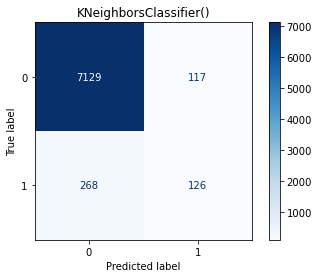

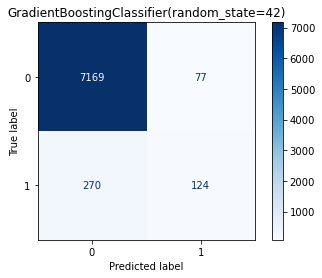

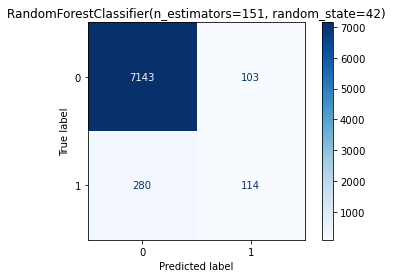

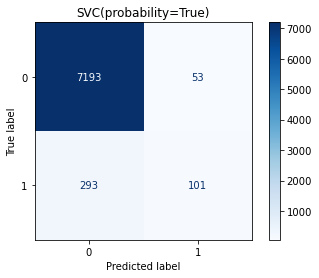

In [ ]:
# лист моделей классификации:
clfs = [clf_kBest, clf_gbst, clf_rndForest, clf_svc]

for clf in clfs: # цикл для каждого классификатора
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues) # нарисуем матрицу ошибок
    plt.title(clf) # зададим название графика
    plt.show(matrix) # отобразим график
    print('\n')# перенос строки


### Метрики качества классификации

In [ ]:
# лист прогноза отношения к классу 0 или 1 для каждого классификатора:
y_preds = [y_pred_kBest, y_pred_gbst, y_pred_rndForest, y_pred_svc] 

for i in range(len(y_preds)): #цикл для каждого классификатора
    print('\nМетрики качества модели градиентного бустинга:',clfs[i], '\n')
    print(classification_report(y_test, y_preds[i]))  # выведем рассчитанные метрики качества



Метрики качества модели градиентного бустинга: KNeighborsClassifier() 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7246
           1       0.52      0.32      0.40       394

    accuracy                           0.95      7640
   macro avg       0.74      0.65      0.68      7640
weighted avg       0.94      0.95      0.94      7640


Метрики качества модели градиентного бустинга: GradientBoostingClassifier(random_state=42) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7246
           1       0.62      0.31      0.42       394

    accuracy                           0.95      7640
   macro avg       0.79      0.65      0.70      7640
weighted avg       0.95      0.95      0.95      7640


Метрики качества модели градиентного бустинга: RandomForestClassifier(n_estimators=151, random_state=42) 

              precision    recall  f1-score   support

           0    

### ROC-кривая и Коэффициент Джини

Коэффициент Джини для KNeighborsClassifier() : 0.55
AUROC для KNeighborsClassifier() : 0.78 

Коэффициент Джини для GradientBoostingClassifier(random_state=42) : 0.84
AUROC для GradientBoostingClassifier(random_state=42) : 0.92 

Коэффициент Джини для RandomForestClassifier(n_estimators=151, random_state=42) : 0.67
AUROC для RandomForestClassifier(n_estimators=151, random_state=42) : 0.84 

Коэффициент Джини для SVC(probability=True) : 0.38
AUROC для SVC(probability=True) : 0.69 



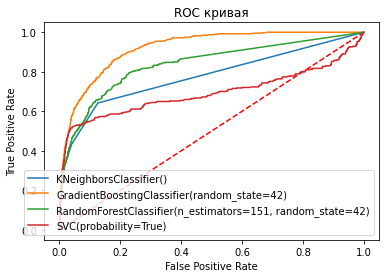

In [ ]:
# лист из прогнозных вероятностей для каждого классификатора:
y_pred_probas = [y_pred_kBest_proba, y_pred_gbst_proba, y_pred_rndForest_proba, y_pred_svc_proba] 


plt.figure() # Создадим график
plt.plot([0, 1], [0, 1],'r--') # отобразим на графике ROC-кривую для случайной модели

for i in range(len(y_pred_probas)): # цикл для каждого классификатора
    roc_auc = roc_auc_score(y_test, y_pred_probas[i]) # Расчет AUROC. На вход подаются наблюдаемые значения тестовой выборки и прогнозные
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas[i]) # Построение ROC- кривой

    plt.plot(fpr, tpr, label= clfs[i]) #отобразим на графике ROC-кривую и значение AUROC
    print('Коэффициент Джини для', clfs[i],':', round(2 * roc_auc - 1,2)) # посчитаем и выведем значение коэффициента Джини для каждого классификатора
    print('AUROC для', clfs[i],':', round(roc_auc,2),'\n') # посчитаем и выведем значение коэффициента Джини для каждого классификатора
   
    
plt.xlabel('False Positive Rate') # название оси х
plt.ylabel('True Positive Rate') # название оси y
plt.title('ROC кривая')# название графика
plt.legend(loc="lower right") # расположение легенды
plt.savefig('Log_ROC') # сохранить график
plt.show(); # отобразитьграфик

## Задание

1.	Изучите пошаговую процедуру построения классификаторов, реализованную в рабочей книге Python Notebook «3.Сравнение альтернатив».
2.	Сравните ключевые метрики качества для полученных моделей. Какую модель следует выбрать?
3.	Попробуйте улучшить качества моделей, оптимизировав параметры классификаторов.

# Поиск гиперпараметров

## 3. Случайный лес (Random Forests);

Реализацию случайного поиска гиперпараметра можно, сначала определив сетку гиперпараметров, которые будут случайным образом выбираться при вызове.RandomizedSearchCV (), Для этого примера я решил разделить наш тренировочный набор на 4 раза (cv = 4) и выберите 80 в качестве количества комбинаций для выборки (n_iter = 80). Использование scikit-learnbest_estimator_атрибут, мы можем затем получить набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [ ]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

<AxesSubplot:xlabel='param_criterion', ylabel='param_n_estimators'>

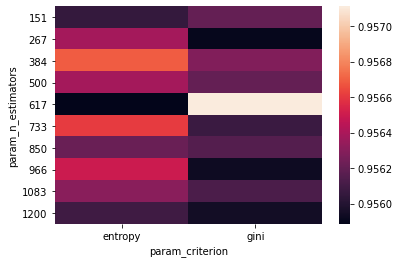

In [ ]:
# визуализация, влияния гиперпараметров  на общую точность модели
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [ ]:
clf_rndForest_new = RandomForestClassifier(criterion = 'entropy',
                                          max_depth= 538,
                                          max_features= None,
                                          min_samples_leaf= 14,
                                          min_samples_split= 7,
                                          n_estimators= 234) 

clf_rndForest_new = clf_rndForest_new.fit(X_train, y_train) # оценим параметры модели


In [ ]:
y_pred_rndForest_new = clf_rndForest_new.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_rndForest_proba_new = clf_rndForest_new.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

### 1. Метод k-ближайших соседей (K-Nearest Neighbors)

В методе KNN выбор значения k очень важен. При маленьком значении k "шум" будет оказывать сильное воздействие на итоговый результат. Большое значение делает его затратным с точки зрения вычислений и противоречит основной идее KNN, что близкие точки могут иметь схожие плотности или классы. Значение по умолчанию для количества k-соседей - 5.

In [ ]:
error_rate = []

for i in range(1,40):
    # создание KNN классификатора с заданным значением k
    knn = KNeighborsClassifier(n_neighbors = i)
    # обучение его на тренировочных данных
    knn.fit(X_train.values, y_train.values)
    # прогноз покупок на тестовых данных
    pred_i = knn.predict(X_test.values)
    # сохранение значения ошибки
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Процент ошибок')

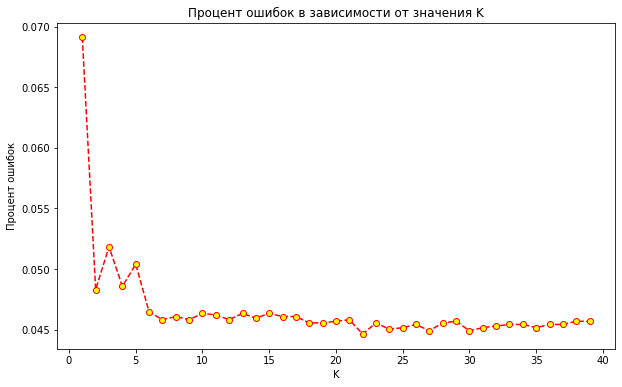

In [ ]:
# графическое представление процента ошибок
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=6)
plt.title('Процент ошибок в зависимости от значения K')
plt.xlabel('K')
plt.ylabel('Процент ошибок')

In [ ]:
clf_kBest_new = KNeighborsClassifier(n_neighbors=22) # создадим модель 5ти ближайших соседей
clf_kBest_new.fit(X_train, y_train)  # оценим параметры модели

KNeighborsClassifier(n_neighbors=22)

In [ ]:
y_pred_kBest_new = clf_kBest.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_kBest_proba_new = clf_kBest.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

### 4. Метод опорных векторов (Support Vector Machines);

Метод опорных векторов (SVM, Support vector machines) использует гиперплоскость, чтобы классифицировать данные по 2 классам.

Метод опорных векторов - это метод "обучения с учителем", использующий классификацию, регрессию и определение выбросов (outlier). Главное преимущество SVM заключается в том, что он эффективен в многомерном пространстве, даже когда количество выборок меньше количества измерений. Но в случаях, когда измерения превышают количество образцов, есть вероятность переобучения.

Основная цель алгоритма SVM - создать оптимальную линию или границу решения, представляющую собой гиперплоскость, которая может разделить n-мерное пространство на классы, чтобы в будущем можно было поместить новую точку данных в правильную категорию.

В отличие от других классификаторов, которые обращают внимание на все точки, этот метод сосредотачиваются только на точках, которые труднее всего классифицировать.

Гиперплоскость - это подпространство, размерность которого на единицу меньше, чем размер его окружающего пространства или пространства, окружающего объект. Если пространство трехмерно, то его гиперплоскости являются двумерными, двумерно, его гиперплоскости являются одномерными линиями, одномерное, его гиперплоскость представляет собой единственную точку.
SVM использует набор математических функций, известных как ядро, для создания границы оптимального решения, принимая данные в качестве входных. Наиболее предпочтительный вид функции ядра - это RBF. Потому что он локализован и имеет конечный отклик по всей оси абсцисс.

Если данные слишком похожи или их сложно разделить по какой-либо причине, или из-за того, что они нелинейны, тогда SVM с ядром может добавить еще одно измерение с «гиперплоскостью», которая может разделить точки данных.

Значениями ядра могут быть:

* linear
* poly
* rbf (по умолчанию)
* sigmoid
* precomputed

In [ ]:
# поиск опимальных гиперпараметров
# библиотека настройки гиперпараметров
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(estimator=SVC(),
            param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2], 'kernel': ('linear', 'rbf')})
g.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

In [ ]:
g.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
clf_svc_new = SVC(probability=True, C=10, gamma=0.1, kernel='rbf') # создадим модельопорных векторов, с возможностью получить прогнозные вероятности (probability=True)
clf_svc_new.fit(X_train, y_train)

SVC(C=10, gamma=0.1, probability=True)

In [ ]:
y_pred_svc_new = clf_svc_new.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_svc_proba_new = clf_svc_new.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

### 3. Случайный лес (Random Forests);

В Grid Search мы настраиваем сетку гиперпараметров и обучаем / тестируем нашу модель на каждой из возможных комбинаций.

### 2. Метод градиентного бустинга (GradientBoostingClassifier)

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps = [
    ('gb', GradientBoostingClassifier())
])


catbst_param_grid = {'gb__n_estimators': [50,100]}
# создаем экземпляр класса GridSearchCV, передав конвейер,
# сетку гиперпараметров и указав количество
# блоков перекрестной проверки, отключив запись метрик
# для обучающих блоков перекрестной проверки в атрибут cv_results_
catbst_pipe = GradientBoostingClassifier()
model_gbm = GridSearchCV(pipe, catbst_param_grid, n_jobs = -1)
# выполняем поиск по всем значениям сетки
model_gbm.fit(X_train, y_train)
#passing the scoring function in the GridSearchCV

prediction_gbm = model_gbm.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,prediction_gbm))
print(classification_report(y_test,prediction_gbm))
acc4 = accuracy_score(y_test,prediction_gbm)


[[7171   75]
 [ 269  125]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7246
           1       0.62      0.32      0.42       394

    accuracy                           0.95      7640
   macro avg       0.79      0.65      0.70      7640
weighted avg       0.95      0.95      0.95      7640



In [ ]:
y_pred_gbst_new = model_gbm.predict(X_test)  # прогноз отношения к классу 0 или 1
y_pred_gbst_proba_new = model_gbm.predict_proba(X_test)[:, 1]  # прогнозные вероятности отношения к классу 0 и 1

Коэффициент Джини для RandomForestClassifier(n_estimators=151, random_state=42) : 0.82
AUROC для RandomForestClassifier(n_estimators=151, random_state=42) : 0.91 

Коэффициент Джини для KNeighborsClassifier(n_neighbors=22) : 0.75
AUROC для KNeighborsClassifier(n_neighbors=22) : 0.87 

Коэффициент Джини для SVC(C=10, gamma=0.1, probability=True) : 0.37
AUROC для SVC(C=10, gamma=0.1, probability=True) : 0.69 

Коэффициент Джини для GradientBoostingClassifier(random_state=42) : 0.84
AUROC для GradientBoostingClassifier(random_state=42) : 0.92 



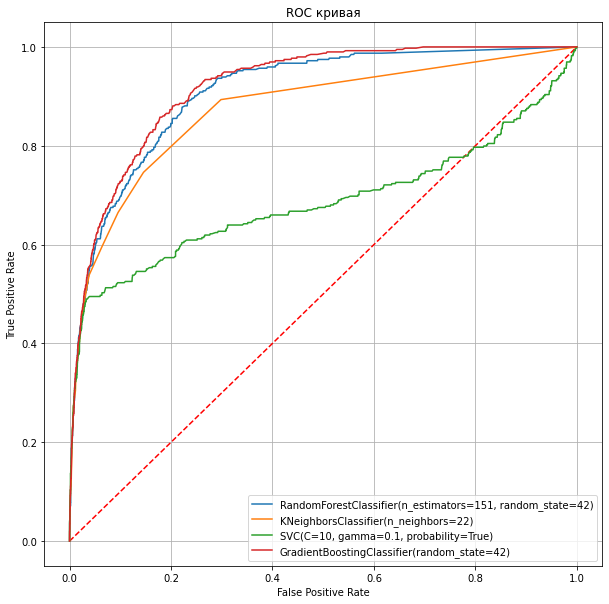

In [ ]:

y_pred_probas_new = [y_pred_rndForest_proba_new, y_pred_kBest_proba_new, y_pred_svc_proba_new, y_pred_gbst_proba_new] 

clfs = [clf_rndForest, clf_kBest, clf_svc, clf_gbst]

fig, ax = plt.subplots(figsize =(10, 10)) # Создадим график
ax.grid()
ax.plot([0, 1], [0, 1],'r--') # отобразим на графике ROC-кривую для случайной модели

for i in range(len(y_pred_probas_new)): # цикл для каждого классификатора
    roc_auc = roc_auc_score(y_test, y_pred_probas_new[i]) # Расчет AUROC. На вход подаются наблюдаемые значения тестовой выборки и прогнозные
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas_new[i]) # Построение ROC- кривой

    plt.plot(fpr, tpr, label= clfs[i]) #отобразим на графике ROC-кривую и значение AUROC
    print('Коэффициент Джини для', clfs[i],':', round(2 * roc_auc - 1,2)) # посчитаем и выведем значение коэффициента Джини для каждого классификатора
    print('AUROC для', clfs[i],':', round(roc_auc,2),'\n') # посчитаем и выведем значение коэффициента Джини для каждого классификатора
   
    
plt.xlabel('False Positive Rate') # название оси х
plt.ylabel('True Positive Rate') # название оси y
plt.title('ROC кривая')# название графика
plt.legend(loc="lower right") # расположение легенды
plt.savefig('Log_ROC') # сохранить график
plt.show(); # отобразитьграфик

In [ ]:
# Создадим сводную таблицу с новыми значениями коэффициента Джини

old_value_jiny = [0.55, 0.84, 0.67, 0.38]
alghorithm_ml = ['Kneighbors', 'GradientBoosting', 'RandomForestClassifier', 'SVC']
new_value_jiny = [0.75, 0.84, 0.82, 0.37]

data = {'alghorithm_ml' : ['Kneighbors', 'GradientBoosting', 'RandomForestClassifier', 'SVC'],
       'old_value_jiny' : [0.55, 0.84, 0.67, 0.38],
        'new_value_jiny' : [0.75, 0.84, 0.82, 0.37]}

df = pd.DataFrame(data)
df['sigma'] = 100*(df['new_value_jiny'] / df['old_value_jiny'] -1)
df

,alghorithm_ml,old_value_jiny,new_value_jiny,sigma
0,Kneighbors,0.55,0.75,36.363636
1,GradientBoosting,0.84,0.84,0.000000
2,RandomForestClassifier,0.67,0.82,22.388060
3,SVC,0.38,0.37,-2.631579


## Вывод:
Качество алгоритмов увеличить получилось за исключением метода SVC. Метод градиентного бустинга показал себя наилучшим образом